In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
train = pd.read_csv("Train (2).csv")
test = pd.read_csv("Test (2).csv")

In [329]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [330]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [331]:
print("shape for train data: ", train.shape)
print("shape for test data: ", test.shape)

shape for train data:  (23524, 13)
shape for test data:  (10086, 12)


In [332]:
print("Train data dtypes: ", train.dtypes)
print("Test data dtypes: ", test.dtypes)

Train data dtypes:  country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object
Test data dtypes:  country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [333]:
print("Train data nulls: ", train.isna().sum())
print("Test data nulls: ", test.isna().sum())

Train data nulls:  country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64
Test data nulls:  country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [334]:
print("Train data duplicates: ", train.duplicated().sum())
print("Test data duplicates: ", test.duplicated().sum())

Train data duplicates:  0
Test data duplicates:  0


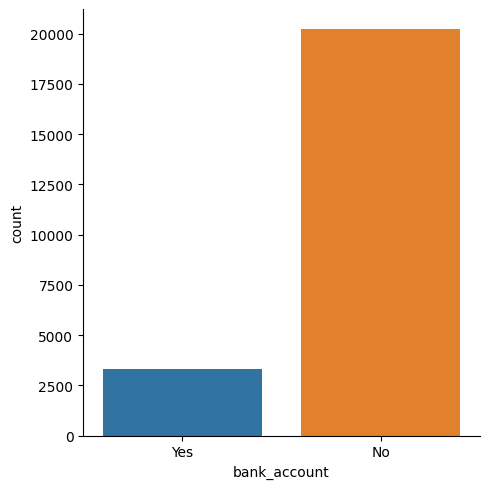

In [335]:
sns.catplot(x="bank_account", kind="count", data=train)

In [336]:
import tensorflow as tf

Encoding the data

In [337]:
# ##function to change bank to int
# def bank(df):
#   if df=='Yes':
#     return 1
#   else:
#     return 0

In [338]:
# train['bank_account']=train['bank_account'].apply(bank)

In [339]:
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [340]:
train["bank_account"].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

Encoding train data

In [341]:
train = train.replace({'location_type' : { 'Rural' : 0, 'Urban' : 1}})
train = train.replace({'bank_account' : { 'No' : 0, 'Yes' : 1}})
train = train.replace({'cellphone_access' : { 'Yes' : 1, 'No' : 0}})
train = train.replace({'gender_of_respondent' : { 'Female' : 0, 'Male' : 1}})
train = train.replace({'country' : { 'Rwanda' : 0, 'Tanzania' : 1, 'Kenya' : 2, 'Uganda' : 3}})
train = train.replace({'relationship_with_head' : { 'Head of Household' : 0, 'Spouse' : 1, 'Parent' : 2, 'Other relative' : 3, 'Other non-relatives' : 4, 'Child' : 5}})
train = train.replace({'marital_status' : { 'Married/Living together' : 0, 'Single/Never Married' : 1, 'Widowed' : 2, 'Divorced/Seperated' : 3, 'Dont know' : 4}})
train = train.replace({'education_level' : { 'Primary education' : 0, 'No formal education' : 1, 'Secondary education' : 2, 'Tertiary education' : 3, 'Vocational/Specialised training' : 4, 'Other/Dont know/RTA' : 5}})
train = train.replace({'job_type' : { 'Self employed' : 0, 'Informally employed' : 1, 'Farming and Fishing' : 2, 'Remittance Dependent' : 3, 'Other Income' : 4, 'Formally employed Private' : 5, 'No Income' : 6, 'Formally employed Government' : 7, 'Government Dependent' : 8, 'Dont Know/Refuse to answer' : 9}})

Encoding test data

In [342]:
test = test.replace({'bank_account' : { 'No' : 0, 'Yes' : 1}})
test = test.replace({'location_type' : { 'Rural' : 0, 'Urban' : 1}})
test = test.replace({'cellphone_access' : { 'Yes' : 1, 'No' : 0}})
test = test.replace({'gender_of_respondent' : { 'Female' : 0, 'Male' : 1}})
test = test.replace({'country' : { 'Rwanda' : 0, 'Tanzania' : 1, 'Kenya' : 2, 'Uganda' : 3}})
test = test.replace({'relationship_with_head' : { 'Head of Household' : 0, 'Spouse' : 1, 'Parent' : 2, 'Other relative' : 3, 'Other non-relatives' : 4, 'Child' : 5}})
test = test.replace({'marital_status' : { 'Married/Living together' : 0, 'Single/Never Married' : 1, 'Widowed' : 2, 'Divorced/Seperated' : 3, 'Dont know' : 4}})
test = test.replace({'education_level' : { 'Primary education' : 0, 'No formal education' : 1, 'Secondary education' : 2, 'Tertiary education' : 3, 'Vocational/Specialised training' : 4, 'Other/Dont know/RTA' : 5}})
test = test.replace({'job_type' : { 'Self employed' : 0, 'Informally employed' : 1, 'Farming and Fishing' : 2, 'Remittance Dependent' : 3, 'Other Income' : 4, 'Formally employed Private' : 5, 'No Income' : 6, 'Formally employed Government' : 7, 'Government Dependent' : 8, 'Dont Know/Refuse to answer' : 9}})

<ipython-input-343-37d85b1ec566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


<Axes: >

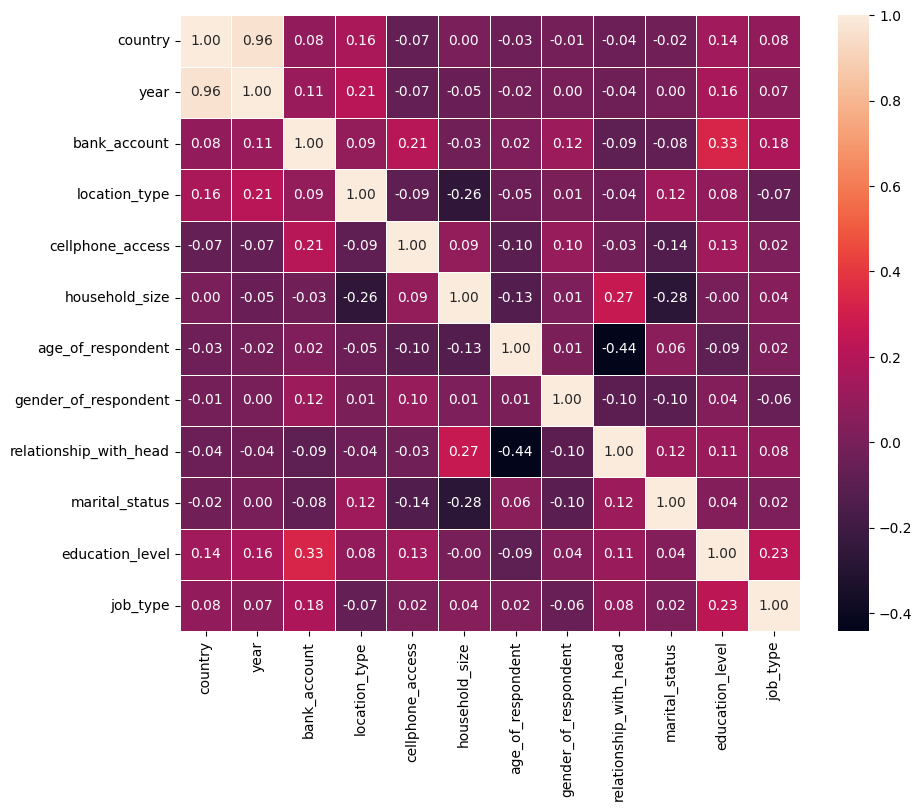

In [343]:
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [344]:
train = train.drop(columns=['country'])
test = test.drop(columns=['country'])


In [345]:
# Prepare the data for training
X_train = train.drop(columns=['uniqueid','bank_account'])
y_train = train['bank_account']


X_test=test.drop(['uniqueid'], axis=1)

In [346]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [347]:
X_train

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,2018,0,1,3,24,0,1,0,2,0
1,2018,0,0,5,70,0,0,2,1,8
2,2018,1,1,5,26,1,3,1,4,0
3,2018,0,1,5,34,0,0,0,0,5
4,2018,1,0,8,26,1,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,1,4,48,0,0,3,1,4
23520,2018,0,1,2,27,0,0,1,2,4
23521,2018,0,1,5,27,0,2,2,0,4
23522,2018,1,1,7,30,0,2,3,2,0


In [348]:
X_train.shape

(23524, 10)

In [349]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Define the neural network model

In [350]:
#shape=X_train.shape[10,]

In [351]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[10,]),  # Use shape attribute
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [352]:
# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [353]:
# Train the model
model.fit(X_train, y_train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


736/736 [==============================] - 2s 2ms/step - loss: 0.6438 - accuracy: 0.8238
Epoch 2/50
736/736 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.8389
Epoch 3/50
736/736 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.8386
Epoch 4/50
736/736 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8397
Epoch 5/50
736/736 [==============================] - 1s 2ms/step - loss: 0.5065 - accuracy: 0.8425
Epoch 6/50
736/736 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.8441
Epoch 7/50
736/736 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.8435
Epoch 8/50
736/736 [==============================] - 1s 2ms/step - loss: 0.4568 - accuracy: 0.8473
Epoch 9/50
736/736 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.8539
Epoch 10/50
736/736 [==============================] - 1s 2ms/step - loss: 0.4177 - accuracy: 0.8511
Epoch 11/5

In [354]:
# model.save('bankmodel')

In [355]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test)


316/316 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [356]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.0
Test Accuracy: 0.0


In [357]:
# Make predictions
pred = model.predict(X_test)

316/316 [==============================] - 0s 1ms/step


In [358]:
pred

array([[0.78120446],
       [0.88240016],
       [0.10263282],
       ...,
       [0.6789991 ],
       [0.0877345 ],
       [0.23321608]], dtype=float32)